# Muon-Decay Monte Carlo Simulations

### Let's plot 2 exponential pulses of amplitudes A1, A2,  decay times Tau1, Tau2 starting at times T1, T2 in a time interval T. All times expressed in ns.


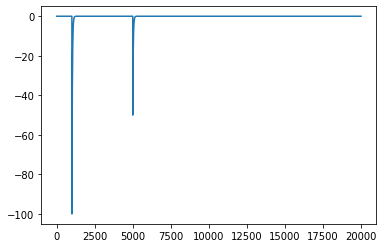

In [45]:
import numpy as np
import matplotlib.pyplot as plt
T = 20000 # ns
A1 = 100 # mV
A2 = 50 # mV
T1 = 1000 # ns
T2 = 5000 # ns
Tau1 = 30 # ns
Tau2 = 30 # ns

Y = []

for t in range(Ttot):
  if (t < T1): y11 = 0
  else: y1 = -A1*np.exp(-(t-T1)/Tau1)
  if (t < T2): y2 = 0
  else: y2 = -A2*np.exp(-(t-T2)/Tau2)
  Y.append(y1+y2)
X = [i for i in range(len(Y))]
plt.plot(X,Y)
plt.show()



### Let´s use Plotly instead of Matplotlib

In [40]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=X, y=Y,mode='lines+markers',
    line=dict(color="green",  width=2),
    marker=dict(color="blue", size=4)))
fig.update_layout(
    title="Simulation of a Double-Pulse Event",
    xaxis_title="Time (ns)",
    yaxis_title="Amplitude (mV)",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Black"))
fig.show(renderer="colab")

### Now we use a time granularity of 8 ns assuming we digitize the signal with an ADC running at 125 MHz

In [41]:
import plotly.graph_objects as go
Y = []
for t in range(0,Ttot,8):
  if (t < T1): y11 = 0
  else: y1 = -A1*np.exp(-(t-T1)/Tau1)
  if (t < T2): y2 = 0
  else: y2 = -A2*np.exp(-(t-T2)/Tau2)
  Y.append(y1+y2)
X = [8*i for i in range(len(Y))]


fig = go.Figure()
fig.add_trace(go.Scatter(x=X, y=Y,mode='lines+markers',
    line=dict(color="green",  width=2),
    marker=dict(color="blue", size=4)))
fig.update_layout(
    title="Simulation of a Double-Pulse Event",
    xaxis_title="Time (ns)",
    yaxis_title="Amplitude (mV)",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Black"))
fig.show(renderer="colab")

### Now we assume that T2 is distributed ramdomly according to an exponential distribution given by

$$ P(t) = \frac{exp(-t/\tau)}{\tau} $$

where P(t)dt is the probability that T2 occurs between t and t+dt

Note that

$$\int_{0}^{\infty}P(t)dt = 1 $$ 


In [43]:
Tau = 2100 # ns
t = np.linspace(0,20000,1000)

def P(t):
    Y = np.exp(-t/Tau) 
    return Y
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=P(t),mode='lines+markers',
    line=dict(color="green",  width=2),
    marker=dict(color="blue", size=4)))
fig.update_layout(
    title="Simulation of a Double-Pulse Event",
    xaxis_title="t (ns)",
    yaxis_title="P(t)",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Black"))
fig.show(renderer="colab")

###. To generate the exponential distribution we generate pairs of points uniformly distributed on a rectangle of height 1 and base T and keep only the points that lie below the exponential curve.

In [67]:
Tau = 2100 # ns
N = 1000
t = np.linspace(0,20000,1000)

def P(t):
    Y = np.exp(-t/Tau) 
    return Y
t2 = np.random.uniform(0,T,N)
Y2 = np.random.uniform(0,1,N)
P2 = P(t2)
marker_color = ["green" if Y2[i]<P2[i] else "red" for i in range(len(t2))]
marker_type = ["circle" if Y2[i]<P2[i] else "x" for i in range(len(t2))]

fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=P(t),mode='lines+markers',
    line=dict(color="green",  width=2),
    marker=dict(color="blue", size=4)))
fig.add_trace(go.Scatter(x=t2, y=Y2,mode='markers',
    marker=dict(color=marker_color, size=8, symbol = marker_type)))
fig.update_layout(
    title="Simulation of a Double-Pulse Event",
    xaxis_title="t (ns)",
    yaxis_title="P(t)",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Black"))
fig.show(renderer="colab")

### By the way, this is the basis of MC integration, i.e., just counting the fraction of green points.


### Now let´s assume that A1 and A2 are distributed normally with a mean values A1_mean, A2_mean  and sigmas A1_sigma, A2_sigma, respectively.

In [96]:
N = 1000
A1_mean = 80 # mV
A1_sigma = 20 # mV
A = np.random.normal(A1_mean,A1_sigma,N)
import plotly.express as px
fig = px.scatter( x=[i for i in range(len(A))], y=A, marginal_y="histogram")
fig.show(renderer="colab")


### Let's generate N events

In [116]:
N = 100
Tau = 2100
A1_mean = 80 # mV
A1_sigma = 20 # mV
A2_mean = 50 # mV
A2_sigma = 20 # mV
T1 = 1000 # ns
T2 = T1 + np.random.exponential(scale=Tau, size=N)
A1 = np.random.normal(A1_mean,A1_sigma,N)
A2 = np.random.normal(A2_mean,A2_sigma,N)


### We can select one event

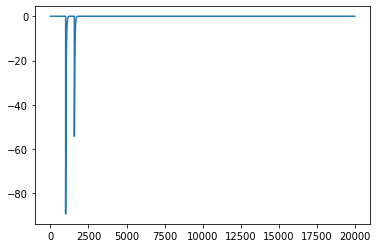

In [117]:
i = 13
Tau1 = 30 # ns
Tau2 = 30 # ns
T1 = 1000 # ns
T = 20000 # ns
Y = []
for t in range(T):
  if (t < T1): y1 = 0
  else: y1 = -A1[i]*np.exp(-(t-T1)/Tau1)
  if (t < T2[i]): y2 = 0
  else: y2 = -A2[i]*np.exp(-(t-T2[i])/Tau2)
  Y.append(y1+y2)
X = [i for i in range(len(Y))]
plt.plot(X,Y)
plt.show()

### Let's make an animation with several events

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


def Grafica(i):
  ax.clear() 
  Y = []
  for t in range(T):
    if (t < T1): y1 = 0
    else: y1 = -A1[i]*np.exp(-(t-T1)/Tau1)
    if (t < T2[i]): y2 = 0
    else: y2 = -A2[i]*np.exp(-(t-T2[i])/Tau2)
    Y.append(y1+y2)
  X = [i for i in range(len(Y))]
  ax.plot(X, Y)
  ax.set_ylim((-150,10)) 
  ax.set_xlabel('t (ns)', fontsize=18)
  ax.set_ylabel('Amplitude (mV)', fontsize=18)
  ax.grid()
 
fig=plt.figure(figsize=(10,7), dpi= 100)
ax= fig.subplots(1,1)
anim = animation.FuncAnimation(fig, Grafica, frames=20 , interval=800)
plt.close()
HTML(anim.to_html5_video())